In [116]:
import pandas as pd
df = pd.read_excel('Table1.xlsx', engine='openpyxl')
print(df.head())

     COM Nom Commune  N TL  P20_SCOL1517  P20_SCOL1824  ETTEF2021  \
0  16001       Abzac     0            16             1          1   
1  16002  Les Adjots     0            25             3          0   
2  16003       Agris     0            34            14          0   
3  16005       Aigre     0            36            13          7   
4  16007      Alloue     0            14             2          0   

   P20_SCOL2529  P20_NSCOL15P_CAPBEP  P20_NSCOL15P_BAC  P20_NSCOL15P_SUP2  \
0             0                  133                58                 32   
1             0                  139                67                 39   
2             1                  227               126                 59   
3             0                  428               231                 93   
4             0                  118                72                 34   

   ...  P20_ACT_SUP5  P20_INACT1564  P20_ETUD1564  P20_RETR1564  \
0  ...      7.061724     100.620543     16.267295     4

In [118]:
import pandas as pd

# Chemin vers votre fichier Excel
file_path = 'Table1.xlsx'

try:
    # Lire le fichier Excel
    df = pd.read_excel(file_path, engine='openpyxl')

    # Afficher les noms des colonnes pour référence
    print("Noms des colonnes avant normalisation :")
    print(df.columns)

    # Supposons que les trois premières colonnes doivent être exclues de la normalisation
    cols_to_exclude = df.columns[:3]

    # Nom de la colonne à utiliser pour la normalisation
    norm_col = 'P20_POP1564'

    # Vérifier si la colonne de normalisation existe dans le DataFrame
    if norm_col not in df.columns:
        raise ValueError(f"La colonne '{norm_col}' n'existe pas dans le DataFrame.")

    # Séparer les colonnes à exclure et celles à vérifier pour le type str
    df_excluded = df[cols_to_exclude]
    df_remaining = df.drop(columns=cols_to_exclude)

    # Identifier les colonnes de type str et exclure également celles-ci
    str_cols = df_remaining.select_dtypes(include=['object']).columns
    cols_to_normalize = df_remaining.drop(columns=str_cols).columns

    # Appliquer la normalisation uniquement sur les colonnes numériques restantes
    df_normalized = df_remaining.copy()
    df_normalized[cols_to_normalize] = df_remaining[cols_to_normalize].div(df[norm_col], axis=0)

    # Réintégrer les trois premières colonnes non modifiées
    df_final = pd.concat([df_excluded, df_normalized], axis=1)

    # Afficher les noms des colonnes après normalisation
    print("Noms des colonnes après normalisation :")
    print(df_final.columns)
    
    # Afficher un aperçu du DataFrame final
    print(df_final.head())

    # Chemin pour enregistrer le fichier CSV
    csv_file_path = 'votre_fichier_normalise.csv'

    # Enregistrer le DataFrame final en fichier CSV
    df_final.to_csv(csv_file_path, index=False)
    print(f"Le fichier CSV a été enregistré sous le nom {csv_file_path}")

except Exception as e:
    print(f"Une erreur s'est produite : {e}")


Noms des colonnes avant normalisation :
Index(['COM', 'Nom Commune', 'N TL', 'P20_SCOL1517', 'P20_SCOL1824',
       'ETTEF2021', 'P20_SCOL2529', 'P20_NSCOL15P_CAPBEP', 'P20_NSCOL15P_BAC',
       'P20_NSCOL15P_SUP2', 'P20_NSCOL15P_SUP34', 'P20_NSCOL15P_SUP5',
       'ETTEF5021', 'ETTEF1021', 'ETTEF121', 'ETTEF021', 'P20_POP1564',
       'P20_ACT1564', 'P20_ACTOCC1564', 'P20_CHOMEUR1564', 'P20_CHOM_DIPLMIN',
       'P20_CHOM_SUP34', 'P20_CHOM_SUP5', 'P20_ACT_DIPLMIN', 'P20_ACT_SUP34',
       'P20_ACT_SUP5', 'P20_INACT1564', 'P20_ETUD1564', 'P20_RETR1564',
       'P20_AINACT1564', 'C20_ACT1564_CS2', 'C20_ACT1564_CS3',
       'C20_ACT1564_CS4', 'MED20', 'NBPERSMENFISC20'],
      dtype='object')
Noms des colonnes après normalisation :
Index(['COM', 'Nom Commune', 'N TL', 'P20_SCOL1517', 'P20_SCOL1824',
       'ETTEF2021', 'P20_SCOL2529', 'P20_NSCOL15P_CAPBEP', 'P20_NSCOL15P_BAC',
       'P20_NSCOL15P_SUP2', 'P20_NSCOL15P_SUP34', 'P20_NSCOL15P_SUP5',
       'ETTEF5021', 'ETTEF1021', 'ETTEF12

In [119]:
print(df_final.head())

     COM Nom Commune  N TL  P20_SCOL1517  P20_SCOL1824  ETTEF2021  \
0  16001       Abzac     0      0.055879      0.003492   0.003492   
1  16002  Les Adjots     0      0.078288      0.009395   0.000000   
2  16003       Agris     0      0.063261      0.026049   0.000000   
3  16005       Aigre     0      0.045068      0.016274   0.008763   
4  16007      Alloue     0      0.053534      0.007648   0.000000   

   P20_SCOL2529  P20_NSCOL15P_CAPBEP  P20_NSCOL15P_BAC  P20_NSCOL15P_SUP2  \
0      0.000000             0.464493          0.202561           0.111758   
1      0.000000             0.435281          0.209812           0.122129   
2      0.001861             0.422362          0.234439           0.109777   
3      0.000000             0.535803          0.289183           0.116424   
4      0.000000             0.451213          0.275317           0.130011   

   ...  P20_ACT_SUP5  P20_INACT1564  P20_ETUD1564  P20_RETR1564  \
0  ...      0.024663       0.351410      0.056812      

In [120]:
import pandas as pd

# Chemin vers votre fichier Excel
file_path = 'Table1.xlsx'

try:
    # Lire le fichier Excel
    df = pd.read_excel(file_path, engine='openpyxl')

    # Afficher les noms des colonnes pour référence
    print("Noms des colonnes avant standardisation :")
    print(df.columns)

    # Supposons que les trois premières colonnes doivent être exclues de la standardisation
    cols_to_exclude = df.columns[:3]

    # Nom de la colonne à utiliser pour la standardisation
    norm_col = 'P20_POP1564'

    # Vérifier si la colonne de normalisation existe dans le DataFrame
    if norm_col not in df.columns:
        raise ValueError(f"La colonne '{norm_col}' n'existe pas dans le DataFrame.")

    # Séparer les colonnes à exclure et celles à vérifier pour le type str
    df_excluded = df[cols_to_exclude]
    df_remaining = df.drop(columns=cols_to_exclude)

    # Identifier les colonnes de type str et exclure également celles-ci
    str_cols = df_remaining.select_dtypes(include=['object']).columns
    cols_to_standardize = df_remaining.drop(columns=str_cols).columns

    # Appliquer la standardisation uniquement sur les colonnes numériques restantes
    df_standardized = df_remaining.copy()
    df_standardized[cols_to_standardize] = (df_remaining[cols_to_standardize] - df_remaining[cols_to_standardize].mean()) / df_remaining[cols_to_standardize].std()

    # Réintégrer les trois premières colonnes non modifiées
    df_final = pd.concat([df_excluded, df_standardized], axis=1)

    # Afficher les noms des colonnes après standardisation
    print("Noms des colonnes après standardisation :")
    print(df_final.columns)
    
    # Afficher un aperçu du DataFrame final
    print(df_final.head())

    # Chemin pour enregistrer le fichier CSV
    csv_file_path = 'votre_fichier_standardise.csv'

    # Enregistrer le DataFrame final en fichier CSV
    df_final.to_csv(csv_file_path, index=False)
    print(f"Le fichier CSV a été enregistré sous le nom {csv_file_path}")

except Exception as e:
    print(f"Une erreur s'est produite : {e}")


Noms des colonnes avant standardisation :
Index(['COM', 'Nom Commune', 'N TL', 'P20_SCOL1517', 'P20_SCOL1824',
       'ETTEF2021', 'P20_SCOL2529', 'P20_NSCOL15P_CAPBEP', 'P20_NSCOL15P_BAC',
       'P20_NSCOL15P_SUP2', 'P20_NSCOL15P_SUP34', 'P20_NSCOL15P_SUP5',
       'ETTEF5021', 'ETTEF1021', 'ETTEF121', 'ETTEF021', 'P20_POP1564',
       'P20_ACT1564', 'P20_ACTOCC1564', 'P20_CHOMEUR1564', 'P20_CHOM_DIPLMIN',
       'P20_CHOM_SUP34', 'P20_CHOM_SUP5', 'P20_ACT_DIPLMIN', 'P20_ACT_SUP34',
       'P20_ACT_SUP5', 'P20_INACT1564', 'P20_ETUD1564', 'P20_RETR1564',
       'P20_AINACT1564', 'C20_ACT1564_CS2', 'C20_ACT1564_CS3',
       'C20_ACT1564_CS4', 'MED20', 'NBPERSMENFISC20'],
      dtype='object')
Noms des colonnes après standardisation :
Index(['COM', 'Nom Commune', 'N TL', 'P20_SCOL1517', 'P20_SCOL1824',
       'ETTEF2021', 'P20_SCOL2529', 'P20_NSCOL15P_CAPBEP', 'P20_NSCOL15P_BAC',
       'P20_NSCOL15P_SUP2', 'P20_NSCOL15P_SUP34', 'P20_NSCOL15P_SUP5',
       'ETTEF5021', 'ETTEF1021', 'ETT

In [179]:
df_stand = pd.read_csv('votre_fichier_normalise.csv')
df = pd.read_excel('Table1.xlsx', engine='openpyxl')
pop = df['P20_POP1564']
df_stand = df_stand.drop(['P20_POP1564'],axis=1)
df_norm = pd.concat([df_stand,pop],axis=1)

In [181]:
# Enregistrer df_stand dans un fichier CSV
df_norm.to_csv('df_norm.csv', index=False)

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Chargement des données depuis le fichier CSV
df = pd.read_excel('Table1.xlsx', engine='openpyxl')

# Sélectionner toutes les colonnes qui ne sont pas de type str
non_str_columns = df.select_dtypes(exclude=['object']).columns

# Stocker les accuracies pour chaque colonne
accuracies = {}

# Pour chaque colonne non de type str
for column in non_str_columns:
    # Sélectionner la colonne comme variable explicative (X) et 'N TL' comme variable cible (y)
    X = df[[column]]
    y = df['N TL']

    # Séparation des données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialisation et entraînement du modèle de régression logistique multinomiale
    model = LogisticRegression(multi_class='multinomial')
    model.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calcul de l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Stocker l'accuracy pour cette colonne
    accuracies[column] = accuracy

# Afficher les accuracies pour chaque colonne
for column, accuracy in accuracies.items():
    print(f"Accuracy pour la colonne '{column}': {accuracy}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Accuracy pour la colonne 'COM': 0.951276102088167
Accuracy pour la colonne 'N TL': 0.9849187935034803
Accuracy pour la colonne 'P20_SCOL1517': 0.951276102088167
Accuracy pour la colonne 'P20_SCOL1824': 0.951276102088167
Accuracy pour la colonne 'ETTEF2021': 0.9535962877030162
Accuracy pour la colonne 'P20_SCOL2529': 0.951276102088167
Accuracy pour la colonne 'P20_NSCOL15P_CAPBEP': 0.9524361948955916
Accuracy pour la colonne 'P20_NSCOL15P_BAC': 0.9524361948955916
Accuracy pour la colonne 'P20_NSCOL15P_SUP2': 0.9501160092807425
Accuracy pour la colonne 'P20_NSCOL15P_SUP34': 0.951276102088167
Accuracy pour la colonne 'P20_NSCOL15P_SUP5': 0.951276102088167
Accuracy pour la colonne 'ETTEF5021': 0.9501160092807425
Accuracy pour la colonne 'ETTEF1021': 0.9535962877030162
Accuracy pour la colonne 'ETTEF121': 0.9501160092807425
Accuracy pour la colonne 'ETTEF021': 0.9477958236658933
Accuracy pour la colonne 'P20_POP1564': 0.951276102088167
Accuracy pour la colonne 'P20_ACT1564': 0.9501160092807

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Chargement des données depuis le fichier CSV
df = pd.read_excel('Table1.xlsx', engine='openpyxl')

# Sélectionner toutes les colonnes qui ne sont pas de type str
non_str_columns = df.select_dtypes(exclude=['object']).columns

# Stocker les scores F1 pour chaque colonne
f1_scores = {}

# Pour chaque colonne non de type str
for column in non_str_columns:
    # Sélectionner la colonne comme variable explicative (X) et 'N TL' comme variable cible (y)
    X = df[[column]]
    y = df['N TL']

    # Séparation des données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialisation et entraînement du modèle de régression logistique multinomiale
    model = LogisticRegression(multi_class='multinomial')
    model.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calcul du score F1
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Stocker le score F1 pour cette colonne
    f1_scores[column] = f1

# Afficher les scores F1 pour chaque colonne
for column, f1 in f1_scores.items():
    print(f"Score F1 pour la colonne '{column}': {f1}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Score F1 pour la colonne 'COM': 0.9275224776602818
Score F1 pour la colonne 'N TL': 0.9799713388835813
Score F1 pour la colonne 'P20_SCOL1517': 0.9321318773495246
Score F1 pour la colonne 'P20_SCOL1824': 0.9275224776602818
Score F1 pour la colonne 'ETTEF2021': 0.9366869323119952
Score F1 pour la colonne 'P20_SCOL2529': 0.9280742459396751
Score F1 pour la colonne 'P20_NSCOL15P_CAPBEP': 0.9344555992262003
Score F1 pour la colonne 'P20_NSCOL15P_BAC': 0.9344555992262003
Score F1 pour la colonne 'P20_NSCOL15P_SUP2': 0.928599675339939
Score F1 pour la colonne 'P20_NSCOL15P_SUP34': 0.9300392445988247
Score F1 pour la colonne 'P20_NSCOL15P_SUP5': 0.9291797542731353
Score F1 pour la colonne 'ETTEF5021': 0.9315005447779942
Score F1 pour la colonne 'ETTEF1021': 0.936596918536893
Score F1 pour la colonne 'ETTEF121': 0.9297077895109891
Score F1 pour la colonne 'ETTEF021': 0.9302435668292305
Score F1 pour la colonne 'P20_POP1564': 0.9321318773495246
Score F1 pour la colonne 'P20_ACT1564': 0.93178450

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [182]:
import pandas as pd

# Charger les données depuis le fichier Excel
#df = pd.read_excel('Table1.xlsx', engine='openpyxl')

# Créer une nouvelle colonne en fonction des valeurs de la colonne 'N TL'
#df['N TL Nouveau'] = df['N TL'].apply(lambda x: 0 if x == 0 else 1)

df = pd.read_csv('df_norm.csv')

# Sélectionner toutes les colonnes qui ne sont pas de type str
non_str_columns = df.select_dtypes(exclude=['object']).columns

# Calculer la corrélation entre chaque variable numérique et la variable cible 'N TL'
correlations = {}
for column in non_str_columns:
    correlation = df['N TL'].corr(df[column])
    correlations[column] = correlation

# Afficher les corrélations pour chaque variable
for column, correlation in correlations.items():
    print(f"Corrélation avec 'N TL' pour la variable '{column}': {correlation}")


Corrélation avec 'N TL' pour la variable 'COM': 0.013547275270960708
Corrélation avec 'N TL' pour la variable 'N TL': 0.9999999999999999
Corrélation avec 'N TL' pour la variable 'P20_SCOL1517': -0.026985018648756784
Corrélation avec 'N TL' pour la variable 'P20_SCOL1824': 0.259930032646065
Corrélation avec 'N TL' pour la variable 'ETTEF2021': 0.0711963556676307
Corrélation avec 'N TL' pour la variable 'P20_SCOL2529': 0.188823019246093
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_CAPBEP': -0.12704414806932382
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_BAC': -0.059271985403153295
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_SUP2': -0.014620457690570191
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_SUP34': 0.050222320929980975
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_SUP5': 0.13749789560253609
Corrélation avec 'N TL' pour la variable 'ETTEF5021': 0.0861398592516943
Corrélation avec 'N TL' pour la variable 'ETTEF1021': 0.08165847707644

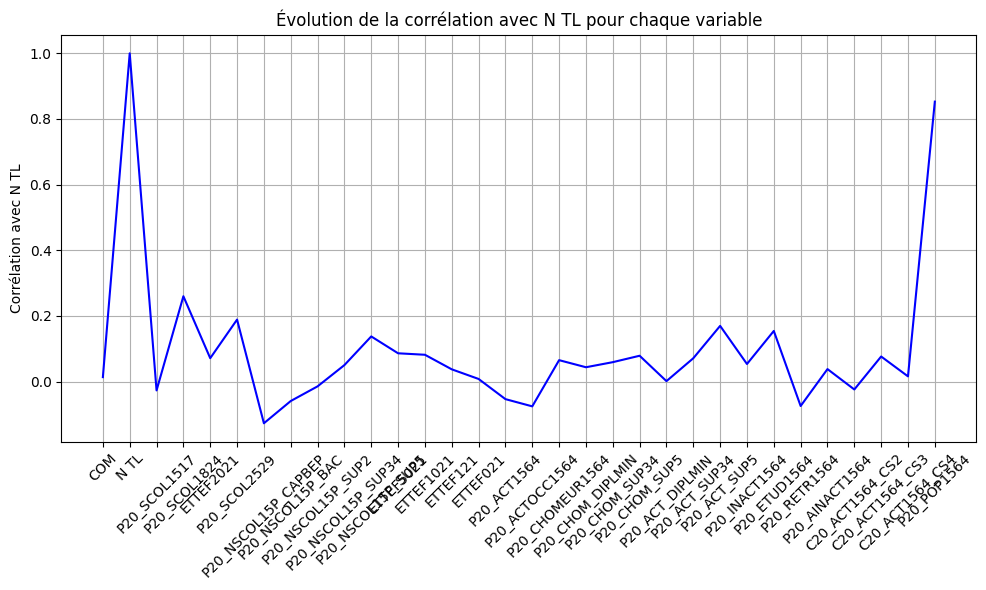

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Créez un DataFrame à partir du dictionnaire de corrélations
correlation_df = pd.DataFrame(correlations.values(), index=correlations.keys(), columns=['Corrélation'])

# Assurez-vous que l'index est au bon format (si nécessaire)
# correlation_df.index = pd.to_datetime(correlation_df.index)

# Tracez le graphique de l'évolution de la corrélation au fil du temps
plt.figure(figsize=(10, 6))
plt.plot(correlation_df.index, correlation_df['Corrélation'], color='blue')
plt.ylabel('Corrélation avec N TL')
plt.title('Évolution de la corrélation avec N TL pour chaque variable')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


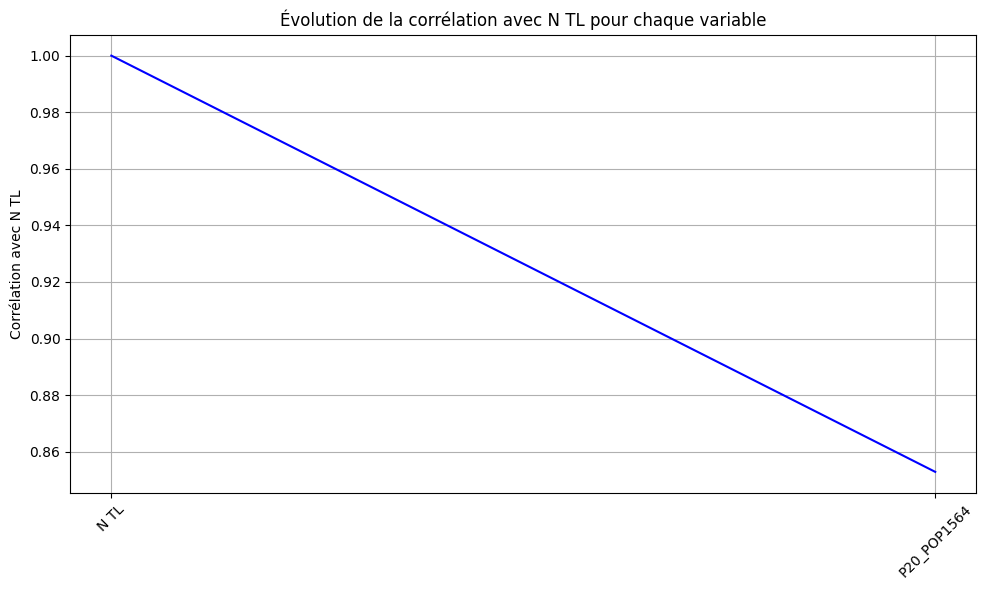

In [184]:
# Créez un DataFrame à partir du dictionnaire de corrélations
correlation_df = pd.DataFrame(correlations.values(), index=correlations.keys(), columns=['Corrélation'])

# Filtrez les corrélations strictement supérieures à 0.8
filtered_correlation_df = correlation_df[correlation_df['Corrélation'] > 0.8]

# Assurez-vous que l'index est au bon format (si nécessaire)
# correlation_df.index = pd.to_datetime(correlation_df.index)

# Tracez le graphique de l'évolution de la corrélation au fil du temps
plt.figure(figsize=(10, 6))
plt.plot(filtered_correlation_df.index, filtered_correlation_df['Corrélation'], color='blue')
plt.ylabel('Corrélation avec N TL')
plt.title('Évolution de la corrélation avec N TL pour chaque variable')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [127]:
import numpy as np
np.shape(filtered_correlation_df)

(24, 1)

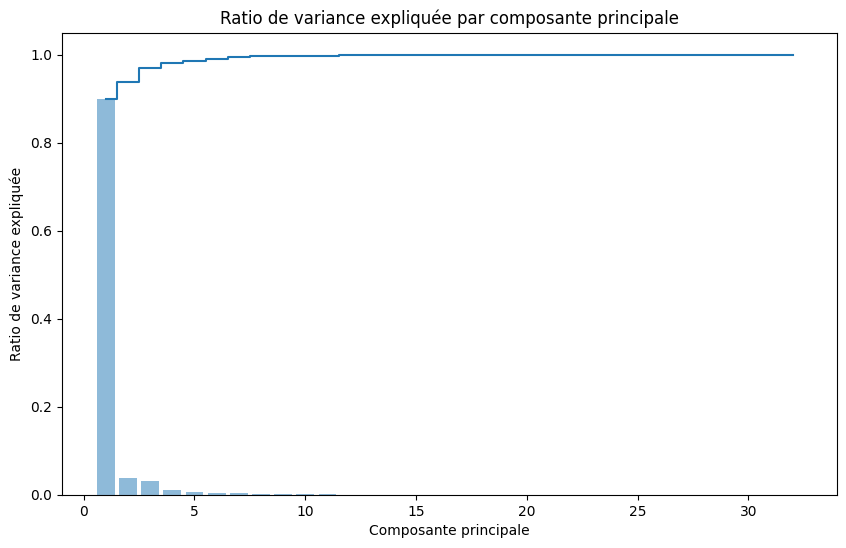

Nombre optimal de composantes principales à conserver : 1


In [193]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
df = pd.read_csv('votre_fichier_standardise.csv')

# Sélectionner toutes les colonnes qui ne sont pas de type str
non_str_columns = df.select_dtypes(exclude=['object']).columns

# Sélectionner les variables numériques
data = df[non_str_columns]

# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Appliquer l'ACP
pca = PCA()
pca.fit(data_scaled)

# Variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), where='mid')
plt.ylabel('Ratio de variance expliquée')
plt.xlabel('Composante principale')
plt.title('Ratio de variance expliquée par composante principale')
plt.show()

# Trouver le nombre optimal de composantes à conserver (point de coude)
cumulative_variance_ratio = explained_variance_ratio.cumsum()
optimal_num_components = 1 + next(index for index, value in enumerate(cumulative_variance_ratio) if value >= 0.90)
print(f"Nombre optimal de composantes principales à conserver : {optimal_num_components}")


In [190]:
# Appliquer l'ACP avec le nombre optimal de composantes
pca = PCA(n_components=20)  # Remplacez 20 par votre nombre optimal de composantes
principal_components = pca.fit_transform(data_scaled)

# Créer un DataFrame pour stocker les composantes principales
columns = [f'PC{i}' for i in range(1, 21)]  # Nommez les composantes principales PC1, PC2, ..., PC20
principal_df = pd.DataFrame(data=principal_components, columns=columns)

# Afficher les premières lignes du DataFrame avec les composantes principales
print(principal_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  5.052711  0.875181 -0.600058 -1.739460  0.300681 -0.064413 -0.484328   
1  1.025292 -0.513867  0.960484 -1.041962  0.383773 -0.719498  0.755080   
2  1.627668 -1.406585  1.764030  1.147070  0.481883 -0.436017  0.643539   
3  3.803477  0.456059  0.404452  2.066309 -0.933006 -0.213109 -1.208947   
4  2.155342 -0.918914 -0.590856  0.144641  0.206041  0.366067  0.833346   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.256773  0.777803 -0.264919 -0.320143 -0.953649  0.024311 -0.048824   
1 -0.516445  1.047758 -0.258576 -0.740846 -0.818925 -0.007398  2.110881   
2 -0.087056  0.107122 -0.563371 -0.718314 -0.167363 -0.167193 -0.539309   
3  0.920456 -0.983417 -1.016840 -0.416309 -0.689350  0.064569 -0.742464   
4 -0.237767  0.083113 -0.697639 -0.181801 -0.135079  0.149959  0.027542   

       PC15      PC16      PC17      PC18      PC19      PC20  
0 -0.734271 -0.796091  0.212367 -0

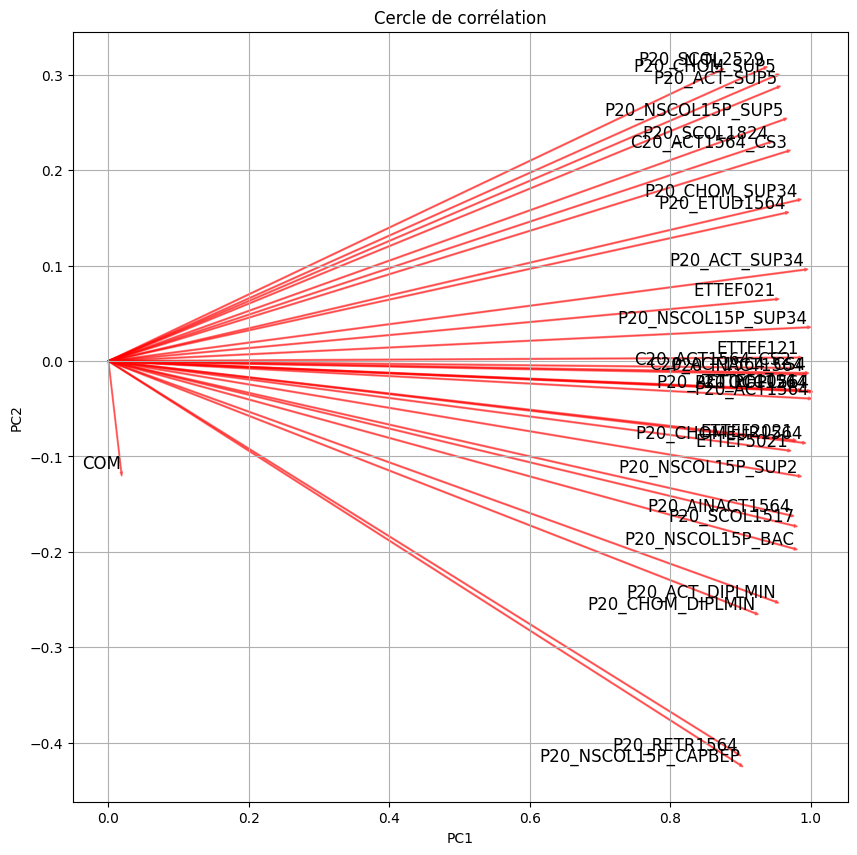

In [194]:
import numpy as np

# Calcul des charges factorielles des variables originales sur les composantes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Créer le cercle de corrélation
fig, ax = plt.subplots(figsize=(10, 10))
for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
    ax.arrow(0, 0, x, y, color='r', alpha=0.5)
    ax.text(x, y, data.columns[i], fontsize='12', ha='right', va='bottom')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cercle de corrélation')
ax.grid()
plt.show()


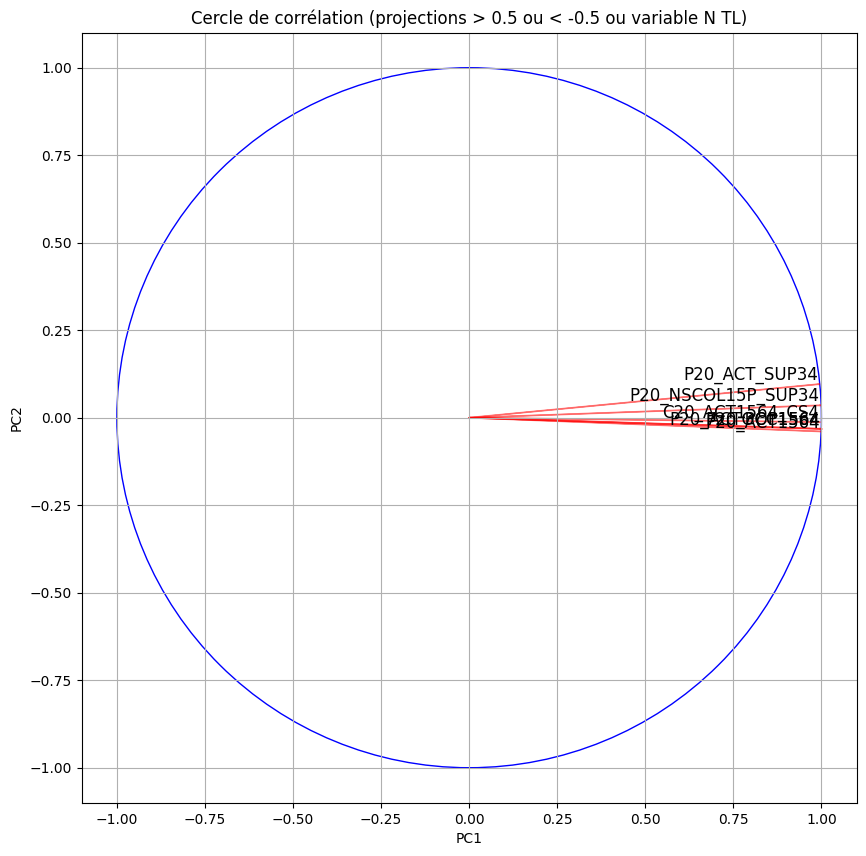

In [195]:
# Créer le cercle de corrélation
fig, ax = plt.subplots(figsize=(10, 10))
circle = plt.Circle((0, 0), 1, color='b', fill=False)  # Créer un cercle unitaire
ax.add_artist(circle)
for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
    if abs(x) >= 0.99 or abs(y) >= 0.99 :
        ax.arrow(0, 0, x, y, color='r', alpha=0.5)
        ax.text(x, y, data.columns[i], fontsize='12', ha='right', va='bottom')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cercle de corrélation (projections > 0.5 ou < -0.5 ou variable N TL)')
ax.grid()
plt.show()


Noms des colonnes avant standardisation :
Index(['COM', 'Nom Commune', 'N TL', 'P20_SCOL1517', 'P20_SCOL1824',
       'ETTEF2021', 'P20_SCOL2529', 'P20_NSCOL15P_CAPBEP', 'P20_NSCOL15P_BAC',
       'P20_NSCOL15P_SUP2', 'P20_NSCOL15P_SUP34', 'P20_NSCOL15P_SUP5',
       'ETTEF5021', 'ETTEF1021', 'ETTEF121', 'ETTEF021', 'P20_POP1564',
       'P20_ACT1564', 'P20_ACTOCC1564', 'P20_CHOMEUR1564', 'P20_CHOM_DIPLMIN',
       'P20_CHOM_SUP34', 'P20_CHOM_SUP5', 'P20_ACT_DIPLMIN', 'P20_ACT_SUP34',
       'P20_ACT_SUP5', 'P20_INACT1564', 'P20_ETUD1564', 'P20_RETR1564',
       'P20_AINACT1564', 'C20_ACT1564_CS2', 'C20_ACT1564_CS3',
       'C20_ACT1564_CS4', 'MED20', 'NBPERSMENFISC20'],
      dtype='object')
Noms des colonnes après standardisation :
Index(['COM', 'Nom Commune', 'N TL', 'P20_SCOL1517', 'P20_SCOL1824',
       'ETTEF2021', 'P20_SCOL2529', 'P20_NSCOL15P_CAPBEP', 'P20_NSCOL15P_BAC',
       'P20_NSCOL15P_SUP2', 'P20_NSCOL15P_SUP34', 'P20_NSCOL15P_SUP5',
       'ETTEF5021', 'ETTEF1021', 'ETT

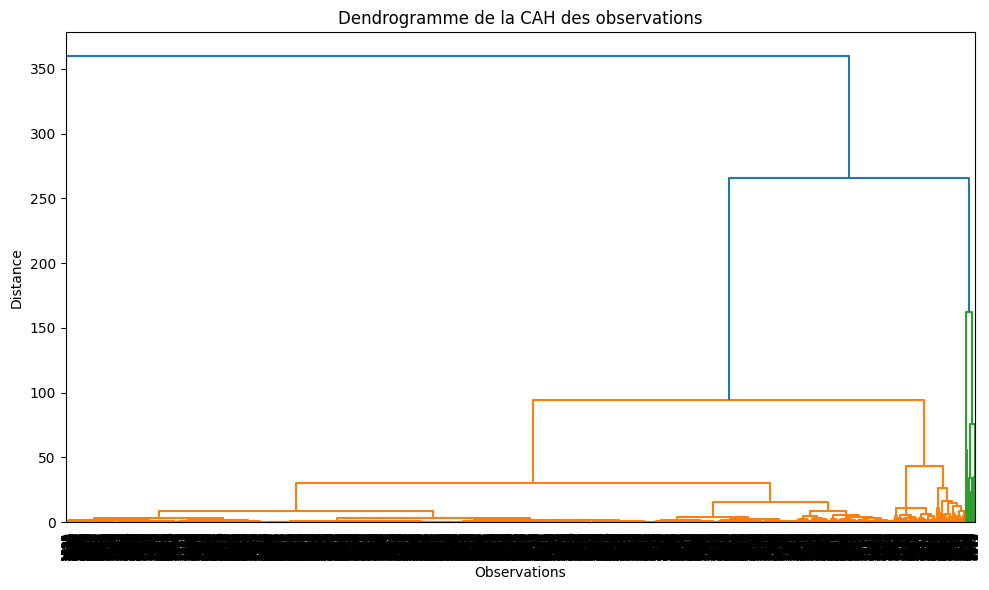

In [132]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Chemin vers votre fichier Excel
file_path = 'Table1.xlsx'

try:
    # Lire le fichier Excel
    df = pd.read_excel(file_path, engine='openpyxl')

    # Afficher les noms des colonnes pour référence
    print("Noms des colonnes avant standardisation :")
    print(df.columns)

    # Supposons que les trois premières colonnes doivent être exclues de la standardisation
    cols_to_exclude = df.columns[:3]

    # Séparer les colonnes à exclure et celles à vérifier pour le type str
    df_excluded = df[cols_to_exclude]
    df_remaining = df.drop(columns=cols_to_exclude)

    # Identifier les colonnes de type str et exclure également celles-ci
    str_cols = df_remaining.select_dtypes(include=['object']).columns
    cols_to_standardize = df_remaining.drop(columns=str_cols).columns

    # Appliquer la standardisation uniquement sur les colonnes numériques restantes
    df_standardized = df_remaining.copy()
    df_standardized[cols_to_standardize] = (df_remaining[cols_to_standardize] - df_remaining[cols_to_standardize].mean()) / df_remaining[cols_to_standardize].std()

    # Réintégrer les trois premières colonnes non modifiées
    df_final = pd.concat([df_excluded, df_standardized], axis=1)

    # Afficher les noms des colonnes après standardisation
    print("Noms des colonnes après standardisation :")
    print(df_final.columns)
    
    # Afficher un aperçu du DataFrame final
    print(df_final.head())

    # Effectuer le clustering hiérarchique ascendant (CAH)
    # On utilise les colonnes numériques standardisées pour le CAH
    df_cah = df_standardized.drop(columns=str_cols)

    # Calculer la matrice de distance entre les observations
    distance_matrix = linkage(df_cah, method='ward')

    # Tracer le dendrogramme
    plt.figure(figsize=(10, 6))
    dendrogram(distance_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8)
    plt.title('Dendrogramme de la CAH des observations')
    plt.xlabel('Observations')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Une erreur s'est produite : {e}")


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Lire le fichier CSV
df = pd.read_csv('df_stand.csv')

# Vérifier les colonnes disponibles
print("Colonnes disponibles :")
print(df.columns)

# Variables explicatives (exclure les colonnes de type str)
str_cols = df.select_dtypes(include=['object']).columns
X = df.drop(columns=['N TL'] + list(str_cols))

# Variable cible
y = df['N TL']

# Vérifier que X et y ont le même nombre de lignes
print(f"Nombre de lignes dans X : {X.shape[0]}")
print(f"Nombre de lignes dans y : {y.shape[0]}")

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs cibles pour l'ensemble de test
y_pred = model.predict(X_test)

# Calculer et afficher l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Colonnes disponibles :
Index(['COM', 'Nom Commune', 'N TL', 'P20_SCOL1517', 'P20_SCOL1824',
       'ETTEF2021', 'P20_SCOL2529', 'P20_NSCOL15P_CAPBEP', 'P20_NSCOL15P_BAC',
       'P20_NSCOL15P_SUP2', 'P20_NSCOL15P_SUP34', 'P20_NSCOL15P_SUP5',
       'ETTEF5021', 'ETTEF1021', 'ETTEF121', 'ETTEF021', 'P20_ACT1564',
       'P20_ACTOCC1564', 'P20_CHOMEUR1564', 'P20_CHOM_DIPLMIN',
       'P20_CHOM_SUP34', 'P20_CHOM_SUP5', 'P20_ACT_DIPLMIN', 'P20_ACT_SUP34',
       'P20_ACT_SUP5', 'P20_INACT1564', 'P20_ETUD1564', 'P20_RETR1564',
       'P20_AINACT1564', 'C20_ACT1564_CS2', 'C20_ACT1564_CS3',
       'C20_ACT1564_CS4', 'MED20', 'NBPERSMENFISC20', 'P20_POP1564'],
      dtype='object')
Nombre de lignes dans X : 4308
Nombre de lignes dans y : 4308
Mean Squared Error: 0.13797645928751298


In [196]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Lire le fichier CSV
df = pd.read_csv('df_norm.csv')

# Vérifier les colonnes disponibles
print("Colonnes disponibles :")
print(df.columns)

# Variables explicatives (exclure les colonnes de type str)
str_cols = df.select_dtypes(include=['object']).columns
X = df.drop(columns=['N TL'] + list(str_cols))

# Variable cible
y = df['N TL']

# Ajouter une constante (intercept) aux variables explicatives
X = sm.add_constant(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression linéaire
model = sm.OLS(y_train, X_train)

# Ajuster le modèle
results = model.fit()

# Afficher le résumé des résultats, y compris les p-values
print(results.summary())

# Prédire les valeurs cibles pour l'ensemble de test
y_pred = results.predict(X_test)

# Calculer et afficher l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Colonnes disponibles :
Index(['COM', 'Nom Commune', 'N TL', 'P20_SCOL1517', 'P20_SCOL1824',
       'ETTEF2021', 'P20_SCOL2529', 'P20_NSCOL15P_CAPBEP', 'P20_NSCOL15P_BAC',
       'P20_NSCOL15P_SUP2', 'P20_NSCOL15P_SUP34', 'P20_NSCOL15P_SUP5',
       'ETTEF5021', 'ETTEF1021', 'ETTEF121', 'ETTEF021', 'P20_ACT1564',
       'P20_ACTOCC1564', 'P20_CHOMEUR1564', 'P20_CHOM_DIPLMIN',
       'P20_CHOM_SUP34', 'P20_CHOM_SUP5', 'P20_ACT_DIPLMIN', 'P20_ACT_SUP34',
       'P20_ACT_SUP5', 'P20_INACT1564', 'P20_ETUD1564', 'P20_RETR1564',
       'P20_AINACT1564', 'C20_ACT1564_CS2', 'C20_ACT1564_CS3',
       'C20_ACT1564_CS4', 'MED20', 'NBPERSMENFISC20', 'P20_POP1564'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   N TL   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     386.1
D

In [198]:
import pandas as pd
import statsmodels.api as sm

# Charger les données
df = pd.read_csv('df_norm.csv')

# Sélectionner les variables explicatives et la variable cible
X = df.drop(columns=['N TL'])
y = df['N TL']

# Supprimer les colonnes de type chaîne de caractères
str_cols = X.select_dtypes(include=['object']).columns
X = X.drop(columns=str_cols)

# Ajouter une constante pour l'interception
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fonction pour réaliser la régression linéaire et supprimer les variables avec p-value > 0.05
def perform_regression(X_train, y_train):
    while True:
        model = sm.OLS(y_train, X_train).fit()
        p_values = model.pvalues.drop('const')  # Exclure la constante
        max_p_value = p_values.max()
        if max_p_value > 0.05:
            worst_feature = p_values.idxmax()
            if worst_feature in X_train.columns:
                X_train = X_train.drop(columns=[worst_feature])
            else:
                print(f"La variable '{worst_feature}' n'existe pas dans le jeu de données.")
                break
        else:
            break
    return model

# Réaliser la régression linéaire
final_model = perform_regression(X_train, y_train)

# Afficher les résultats du modèle final
print(final_model.summary())

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


                            OLS Regression Results                            
Dep. Variable:                   N TL   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1799.
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:05:42   Log-Likelihood:                -2035.1
No. Observations:                3446   AIC:                             4084.
Df Residuals:                    3439   BIC:                             4127.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0568      0.021      2.696   

In [169]:
# Obtenez les noms de colonnes des DataFrames
correlation_columns = filtered_correlation_df.index.tolist()
model_columns = final_model.params.index.tolist()

# Vérifiez si les noms de colonnes sont les mêmes
if set(correlation_columns) == set(model_columns):
    print("Les variables dans filtered_correlation_df et final_model sont les mêmes.")
else:
    print("Les variables dans filtered_correlation_df et final_model ne sont pas les mêmes.")


Les variables dans filtered_correlation_df et final_model ne sont pas les mêmes.


In [170]:
# Colonnes présentes dans filtered_correlation_df mais pas dans final_model
missing_in_model = set(correlation_columns) - set(model_columns)

# Colonnes présentes dans final_model mais pas dans filtered_correlation_df
missing_in_correlation = set(model_columns) - set(correlation_columns)

# Afficher les colonnes manquantes
print("Colonnes présentes dans filtered_correlation_df mais pas dans final_model:")
print(missing_in_model)

print("\nColonnes présentes dans final_model mais pas dans filtered_correlation_df:")
print(missing_in_correlation)


Colonnes présentes dans filtered_correlation_df mais pas dans final_model:
{'P20_CHOM_SUP5', 'P20_CHOMEUR1564', 'P20_NSCOL15P_SUP5', 'ETTEF1021', 'N TL', 'P20_ACT1564', 'C20_ACT1564_CS2', 'P20_NSCOL15P_SUP34'}

Colonnes présentes dans final_model mais pas dans filtered_correlation_df:
{'P20_NSCOL15P_BAC', 'P20_RETR1564', 'const', 'P20_NSCOL15P_CAPBEP', 'P20_SCOL1517', 'P20_ACT_DIPLMIN'}


In [171]:
# Obtenez les noms de colonnes communs
common_columns = list(set(correlation_columns) & set(model_columns))
print("Colonnes communes :", common_columns)


Colonnes communes : ['P20_CHOM_SUP34', 'P20_POP1564', 'P20_AINACT1564', 'ETTEF021', 'P20_NSCOL15P_SUP2', 'P20_ETUD1564', 'P20_INACT1564', 'P20_SCOL1824', 'P20_ACT_SUP34', 'C20_ACT1564_CS4', 'C20_ACT1564_CS3', 'P20_ACTOCC1564', 'ETTEF121', 'P20_SCOL2529', 'ETTEF2021', 'P20_ACT_SUP5']


In [172]:
np.shape(common_columns)

(16,)

In [173]:
# Liste des colonnes à inclure dans le nouveau DataFrame
columns_to_include = ["COM", "Nom Commune", "N TL"] + common_columns

# Charger le DataFrame initial à partir de Table1.xlsx
df = pd.read_excel('Table1.xlsx', engine='openpyxl')

# Sélectionner les colonnes spécifiées
selected_df = df[columns_to_include]

# Enregistrer le DataFrame sélectionné dans un fichier CSV
selected_df.to_csv('selected_variables.csv', index=False)


In [174]:
selected_df.head()

,COM,Nom Commune,N TL,P20_CHOM_SUP34,P20_POP1564,P20_AINACT1564,ETTEF021,P20_NSCOL15P_SUP2,P20_ETUD1564,P20_INACT1564,P20_SCOL1824,P20_ACT_SUP34,C20_ACT1564_CS4,C20_ACT1564_CS3,P20_ACTOCC1564,ETTEF121,P20_SCOL2529,ETTEF2021,P20_ACT_SUP5
0,16001,Abzac,0,0.000000,286.333461,38.202163,0,32,16.267295,100.620543,1,12.102869,25.231153,0.000000,157.357798,11,0,1,7.061724
1,16002,Les Adjots,0,0.000000,319.333868,40.258910,0,39,26.683218,81.589260,3,18.654656,44.286133,9.865118,211.240694,8,0,0,15.716963
2,16003,Agris,0,0.000000,537.453410,30.833425,3,59,36.276000,115.236952,14,21.056554,80.400769,20.465559,366.047618,21,1,0,13.193795
3,16005,Aigre,0,5.020453,798.801007,83.668418,6,93,39.657939,216.673739,13,34.179075,111.651812,40.045551,491.532472,37,0,7,19.120029
4,16007,Alloue,0,1.031181,261.517159,22.231557,3,34,14.244826,65.797033,2,9.177007,25.340139,5.078228,171.302996,9,0,0,11.131274


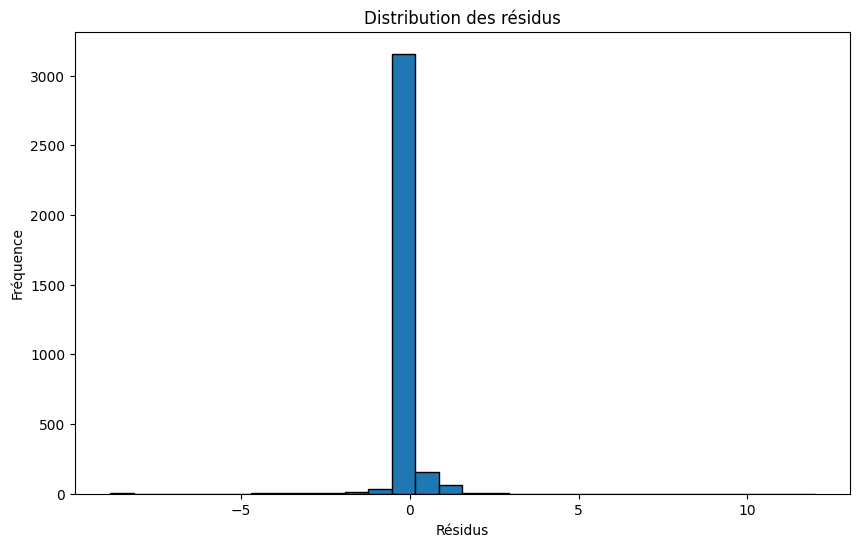

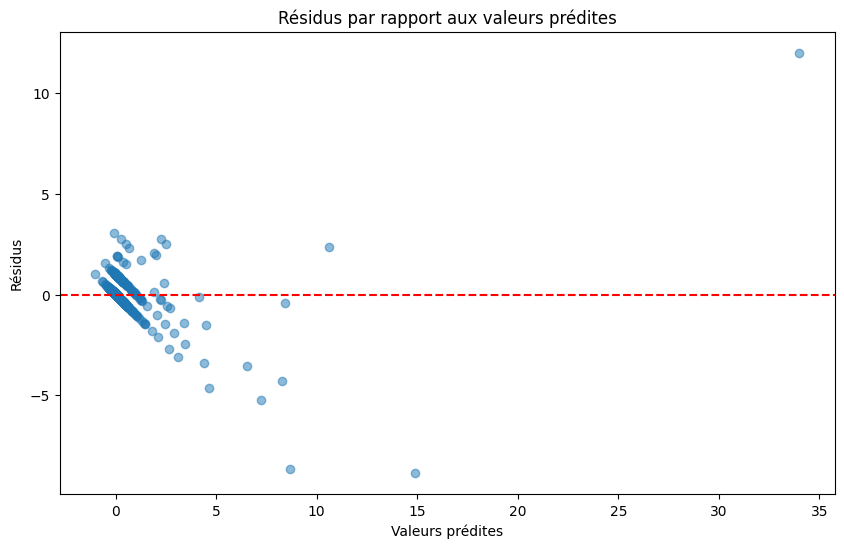

Indices des observations avec des résidus élevés : [ 127  433  463  605  937 1055 1181 1532 1543 1676 2285 2297 2326 2432
 2504 2513 2551 2788 2939 3030]
Caractéristiques des observations avec des résidus élevés :
        COM                    Nom Commune  N TL  P20_SCOL1517  P20_SCOL1824  \
127   16144                      Fouqueure     0      0.076905      0.024286   
433   17074                   Bussac-Foret     0      0.059855      0.026935   
463   17107                   Cire-d'Aunis     0      0.069765      0.028727   
605   17256                       Nantille     0      0.075697      0.020186   
937   19114                      Lignareix     0      0.072917      0.072917   
1055  19238                     Saint-Remy     0      0.053740      0.033588   
1181  23077               Faux-la-Montagne     1      0.055619      0.000000   
1532  24206                         Grives     0      0.094896      0.063264   
1543  24217                       Journiac     0      0.055740    

In [203]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('df_norm.csv')

# Sélectionner les variables explicatives et la variable cible
X = df.drop(columns=['N TL'])
y = df['N TL']

# Supprimer les colonnes de type chaîne de caractères
str_cols = X.select_dtypes(include=['object']).columns
X = X.drop(columns=str_cols)

# Ajouter une constante pour l'interception
X = sm.add_constant(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Réaliser la régression linéaire sur l'ensemble d'entraînement
model = sm.OLS(y_train, X_train).fit()

# Calculer les résidus
residuals = model.resid

# Afficher la distribution des résidus
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Afficher un graphique des résidus par rapport aux valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X_train), residuals, alpha=0.5)
plt.title('Résidus par rapport aux valeurs prédites')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Identifier les observations avec des résidus élevés
threshold = 2  # Seuil pour les résidus élevés
outliers = np.where(np.abs(residuals) > threshold)[0]
print("Indices des observations avec des résidus élevés :", outliers)

# Analyser les caractéristiques des observations avec des résidus élevés
print("Caractéristiques des observations avec des résidus élevés :")
print(df.iloc[outliers])

# Vous pouvez également calculer des statistiques récapitulatives sur les résidus
print("Statistiques récapitulatives des résidus :")
print(residuals.describe())


In [201]:
selected_df_numeric = selected_df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
correlation_matrix = selected_df_numeric.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)



                        COM      N TL  P20_CHOM_SUP34  P20_POP1564  \
COM                1.000000  0.013547        0.010829     0.022797   
N TL               0.013547  1.000000        0.898828     0.852859   
P20_CHOM_SUP34     0.010829  0.898828        1.000000     0.975278   
P20_POP1564        0.022797  0.852859        0.975278     1.000000   
P20_AINACT1564     0.015213  0.815390        0.931365     0.973172   
ETTEF021          -0.008376  0.876132        0.939708     0.935909   
P20_NSCOL15P_SUP2  0.026649  0.808653        0.942138     0.986711   
P20_ETUD1564       0.020835  0.862962        0.979234     0.963346   
P20_INACT1564      0.021620  0.848546        0.974225     0.991526   
P20_SCOL1824       0.016361  0.858707        0.969924     0.937178   
P20_ACT_SUP34      0.020636  0.878554        0.989291     0.988641   
C20_ACT1564_CS4    0.024410  0.847562        0.970659     0.994405   
C20_ACT1564_CS3    0.013806  0.890037        0.983556     0.959285   
P20_ACTOCC1564     0

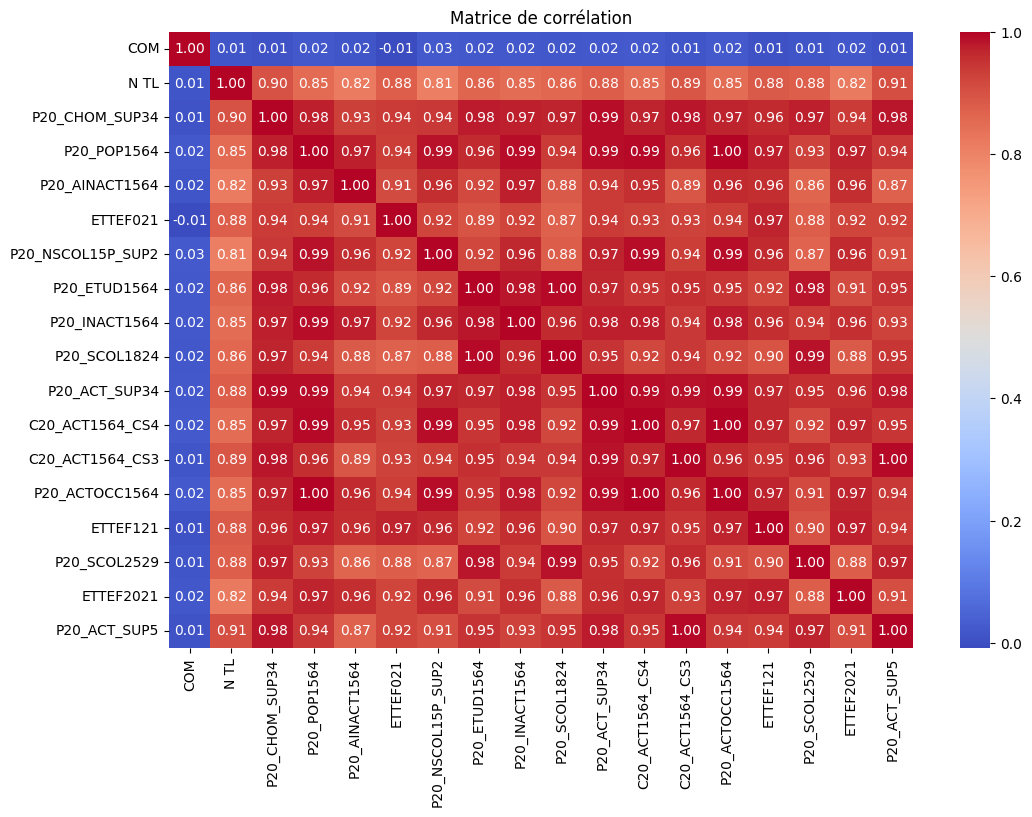

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = selected_df_numeric.corr()

# Créer une figure et un axe
plt.figure(figsize=(12, 8))

# Tracer la matrice de corrélation avec des carrés de couleur
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajouter un titre
plt.title('Matrice de corrélation')

# Afficher le graphique
plt.show()


In [2]:
import pandas as pd

# Charger le fichier CSV
df_stand = pd.read_csv('df_stand.csv')

# Créer la nouvelle colonne NTLBIN
df_stand['NTLBIN'] = df_stand['N TL'].apply(lambda x: 0 if x == 0 else 1)

# Supprimer la colonne N TL
df_stand = df_stand.drop(columns=['N TL'])

# Enregistrer le DataFrame modifié dans un nouveau fichier CSV
df_stand.to_csv('df_stand_modified.csv', index=False)

# Afficher les premières lignes pour vérifier
df_stand


,COM,Nom Commune,P20_SCOL1517,P20_SCOL1824,ETTEF2021,P20_SCOL2529,P20_NSCOL15P_CAPBEP,P20_NSCOL15P_BAC,P20_NSCOL15P_SUP2,P20_NSCOL15P_SUP34,...,P20_ETUD1564,P20_RETR1564,P20_AINACT1564,C20_ACT1564_CS2,C20_ACT1564_CS3,C20_ACT1564_CS4,MED20,NBPERSMENFISC20,P20_POP1564,NTLBIN
0,16001,Abzac,0.055879,0.003492,0.003492,0.000000,0.464493,0.202561,0.111758,0.094296,...,0.056812,0.161180,0.133418,0.087761,0.000000,0.088118,17790,414,286.333461,0
1,16002,Les Adjots,0.078288,0.009395,0.000000,0.000000,0.435281,0.209812,0.122129,0.075156,...,0.083559,0.045868,0.126072,0.107211,0.030893,0.138683,18440,518,319.333868,0
2,16003,Agris,0.063261,0.026049,0.000000,0.001861,0.422362,0.234439,0.109777,0.055819,...,0.067496,0.089547,0.057369,0.084381,0.038079,0.149596,19930,834,537.453410,0
3,16005,Aigre,0.045068,0.016274,0.008763,0.000000,0.535803,0.289183,0.116424,0.073861,...,0.049647,0.116859,0.104743,0.032001,0.050132,0.139774,19770,1369,798.801007,0
4,16007,Alloue,0.053534,0.007648,0.000000,0.000000,0.451213,0.275317,0.130011,0.057358,...,0.054470,0.112118,0.085010,0.077281,0.019418,0.096897,18680,452,261.517159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,87202,Veyrac,0.064968,0.037652,0.001477,0.001477,0.312289,0.236247,0.143963,0.135104,...,0.084578,0.067479,0.047724,0.055939,0.123137,0.242080,24130,2175,1354.512812,0
4304,87203,Vicq-sur-Breuilh,0.070876,0.026724,0.000000,0.001162,0.297447,0.227733,0.160342,0.122000,...,0.081833,0.061382,0.037283,0.069552,0.093025,0.247670,22760,1357,860.658010,0
4305,87204,Videix,0.028037,0.018692,0.000000,0.000000,0.598131,0.242991,0.084112,0.065421,...,0.046729,0.168224,0.112150,0.140187,0.000000,0.046729,17930,197,107.000000,0
4306,87205,Le Vigen,0.073759,0.052482,0.005674,0.000709,0.303546,0.229078,0.207092,0.160993,...,0.112766,0.089362,0.047518,0.039007,0.152482,0.297872,24760,2264,1410.000000,0


In [4]:
import pandas as pd

# Charger les données depuis le fichier Excel
#df = pd.read_excel('Table1.xlsx', engine='openpyxl')

# Créer une nouvelle colonne en fonction des valeurs de la colonne 'N TL'
#df['N TL Nouveau'] = df['N TL'].apply(lambda x: 0 if x == 0 else 1)

df = pd.read_csv('df_stand_modified.csv')

# Sélectionner toutes les colonnes qui ne sont pas de type str
non_str_columns = df.select_dtypes(exclude=['object']).columns

# Calculer la corrélation entre chaque variable numérique et la variable cible 'N TL'
correlations = {}
for column in non_str_columns:
    correlation = df['NTLBIN'].corr(df[column])
    correlations[column] = correlation

# Afficher les corrélations pour chaque variable
for column, correlation in correlations.items():
    print(f"Corrélation avec 'N TL' pour la variable '{column}': {correlation}")


Corrélation avec 'N TL' pour la variable 'COM': 0.018302493070211187
Corrélation avec 'N TL' pour la variable 'P20_SCOL1517': -0.008141828285590416
Corrélation avec 'N TL' pour la variable 'P20_SCOL1824': 0.2069554052030935
Corrélation avec 'N TL' pour la variable 'ETTEF2021': 0.14730359304704818
Corrélation avec 'N TL' pour la variable 'P20_SCOL2529': 0.12750156636753182
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_CAPBEP': -0.11623851717418786
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_BAC': -0.06505422886537181
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_SUP2': -0.007089960307492242
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_SUP34': 0.053896589033054325
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_SUP5': 0.12763115746977957
Corrélation avec 'N TL' pour la variable 'ETTEF5021': 0.16762740819830513
Corrélation avec 'N TL' pour la variable 'ETTEF1021': 0.17228945271629703
Corrélation avec 'N TL' pour la variable 'ETTEF121': 0.07539